<a href="https://colab.research.google.com/github/jongbokhi/master_thesis_2023/blob/main/Visualization_reuslts_of_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Plot the result of evaluation


1.   Confusion Matrix
2.   Compare Scores: Accuracy, F1, Recall
3.   ROC curves
4.   Precison-Rcall curves



In [ ]:
import pandas as pd
import numpy as np
from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import joblib
from time import process_time
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, StratifiedKFold
from sklearn.metrics import precision_recall_curve, auc, roc_curve, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [ ]:
#Load saved training and testing dataset
X_train = pd.read_csv('/content/drive/MyDrive/new_cic_ids_2018 data/X_train.csv')
y_train = pd.read_csv('/content/drive/MyDrive/new_cic_ids_2018 data/y_train.csv')
X_test = pd.read_csv('/content/drive/MyDrive/new_cic_ids_2018 data/X_test.csv')
y_test = pd.read_csv('/content/drive/MyDrive/new_cic_ids_2018 data/y_test.csv')

In [ ]:
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

##Load the trained models

In [ ]:
model_rf = joblib.load("/content/drive/MyDrive/saved_models/RandomForest_v2.pkl")
model_nb = joblib.load("/content/drive/MyDrive/saved_models/NaiveBayes_v2.pkl")
model_svc = joblib.load("/content/drive/MyDrive/saved_models/SVC_v2.pkl")
model_dt = joblib.load("/content/drive/MyDrive/saved_models/decisiontree_v2.pkl")
model_xgb = joblib.load("/content/drive/MyDrive/saved_models/XGBoost_v2.pkl")
model_lgbm = joblib.load("/content/drive/MyDrive/saved_models/Lightgbm_v2.pkl")
model_lg =  joblib.load("/content/drive/MyDrive/saved_models/logisticregression_v2.pkl")

In [ ]:
models = [model_rf, model_nb, model_svc, model_dt, model_xgb, model_lgbm, model_lg]
model_names = ['Random Forest', 'Naive Bayes', 'SVC', 'Decision Tree', 'XGBoost', 'LightGBM', 'Logistic Regression']

##Confusion Matrix

------------------------- Random Forest -------------------------
              precision    recall  f1-score   support

           0     0.9999    0.9999    0.9999     39280
           1     0.9995    0.9995    0.9995      6520

    accuracy                         0.9999     45800
   macro avg     0.9997    0.9997    0.9997     45800
weighted avg     0.9999    0.9999    0.9999     45800

------------------------- Naive Bayes -------------------------
              precision    recall  f1-score   support

           0     0.9963    0.9931    0.9947     39280
           1     0.9594    0.9778    0.9685      6520

    accuracy                         0.9909     45800
   macro avg     0.9778    0.9854    0.9816     45800
weighted avg     0.9910    0.9909    0.9910     45800

------------------------- SVC -------------------------
              precision    recall  f1-score   support

           0     0.9998    0.9954    0.9976     39280
           1     0.9730    0.9986    0.9856      65

Text(0.5, 0.98, 'Confusion Matrix')

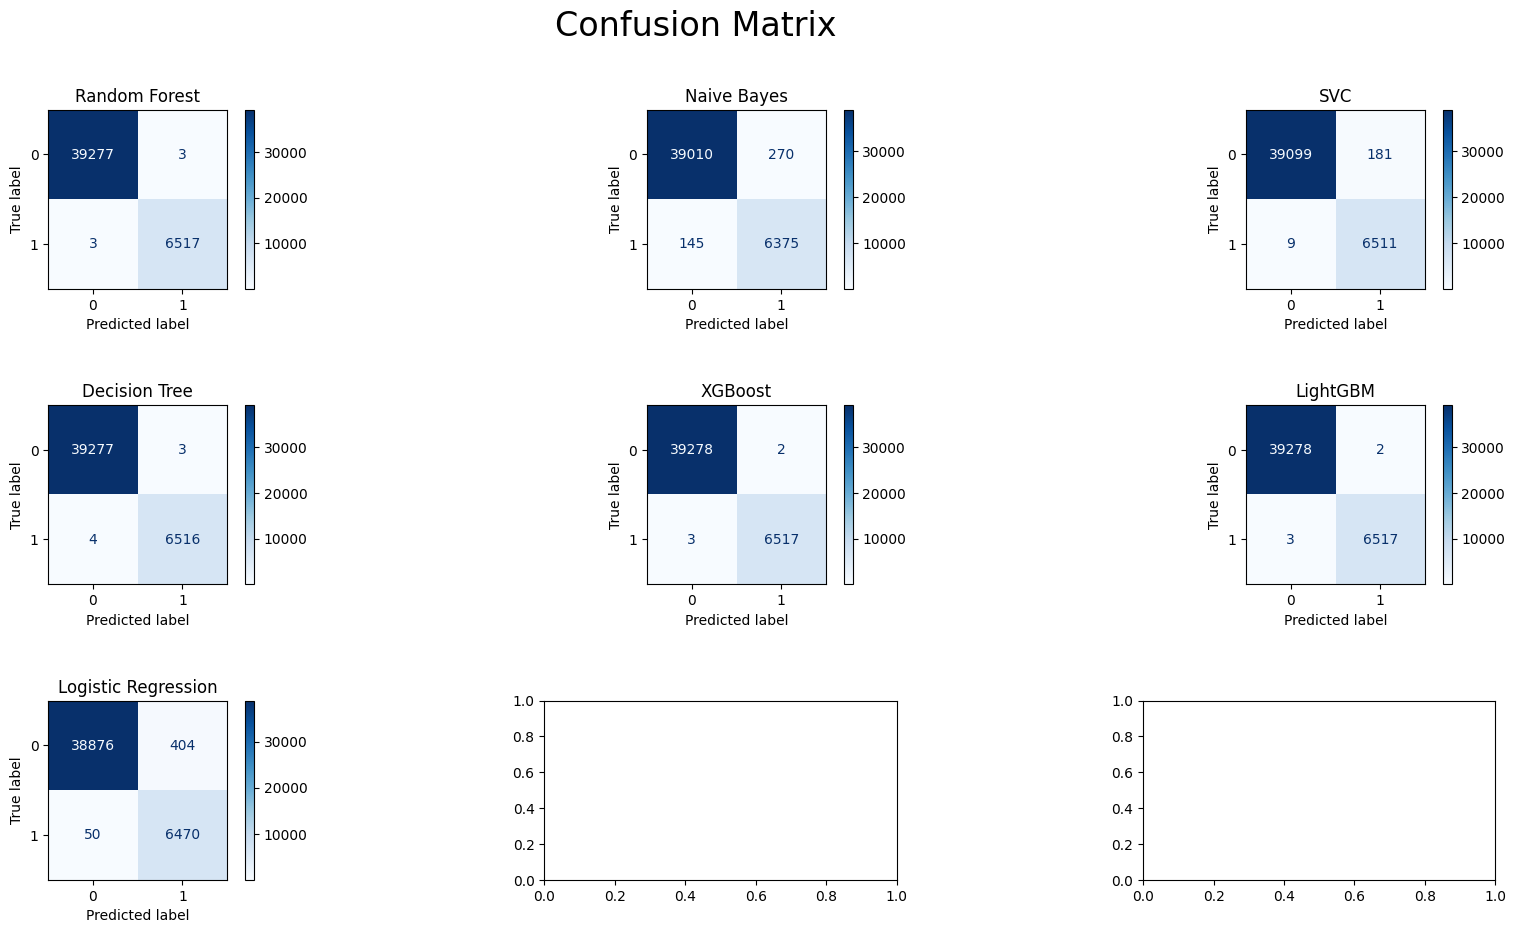

In [ ]:

prediction_time = {}
accuracy_testing_dataset = {}
f_score_testing_dataset = {}
recall_testing_dataset = {}
precision_testing_dataset = {}

#num_models = len(models)
#num_rows = math.ceil(num_models/3)
#num_cols = min(num_models, 3)

fig, axes = plt.subplots(3, 3, figsize=(20, 10))

for i, (model, clf) in enumerate(zip(model_names, models)):
    prediction_start_time = process_time()
    prediction = clf.predict(X_test)

    # save the time consumption for prediction
    prediction_time[model] = process_time() - prediction_start_time

    model_report = classification_report(y_test, prediction, digits=4, output_dict=True)

    # save the accuracy and the f1-score of each model
    accuracy_testing_dataset[model] = model_report['accuracy']
    f_score_testing_dataset[model] = model_report['weighted avg']['f1-score']
    recall_testing_dataset[model] = model_report['weighted avg']['recall']
    precision_testing_dataset[model] = model_report['weighted avg']['precision']

    print(f"{'-'*25} {model} {'-'*25}")
    print(classification_report(y_test, prediction, digits=4))

    disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, cmap=plt.cm.Blues, ax=axes[math.floor(i/3)][i%3])
    disp.ax_.set_title(model)

fig.subplots_adjust(hspace=0.65, wspace=0.7)
fig.suptitle('Confusion Matrix', fontsize=24)


### Compare the results from multiple models

In [ ]:
# define function to create label on top of the bars
def label_top(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2, height, f"{height:.2f}", ha='center', va='bottom')

##1.Accuracy

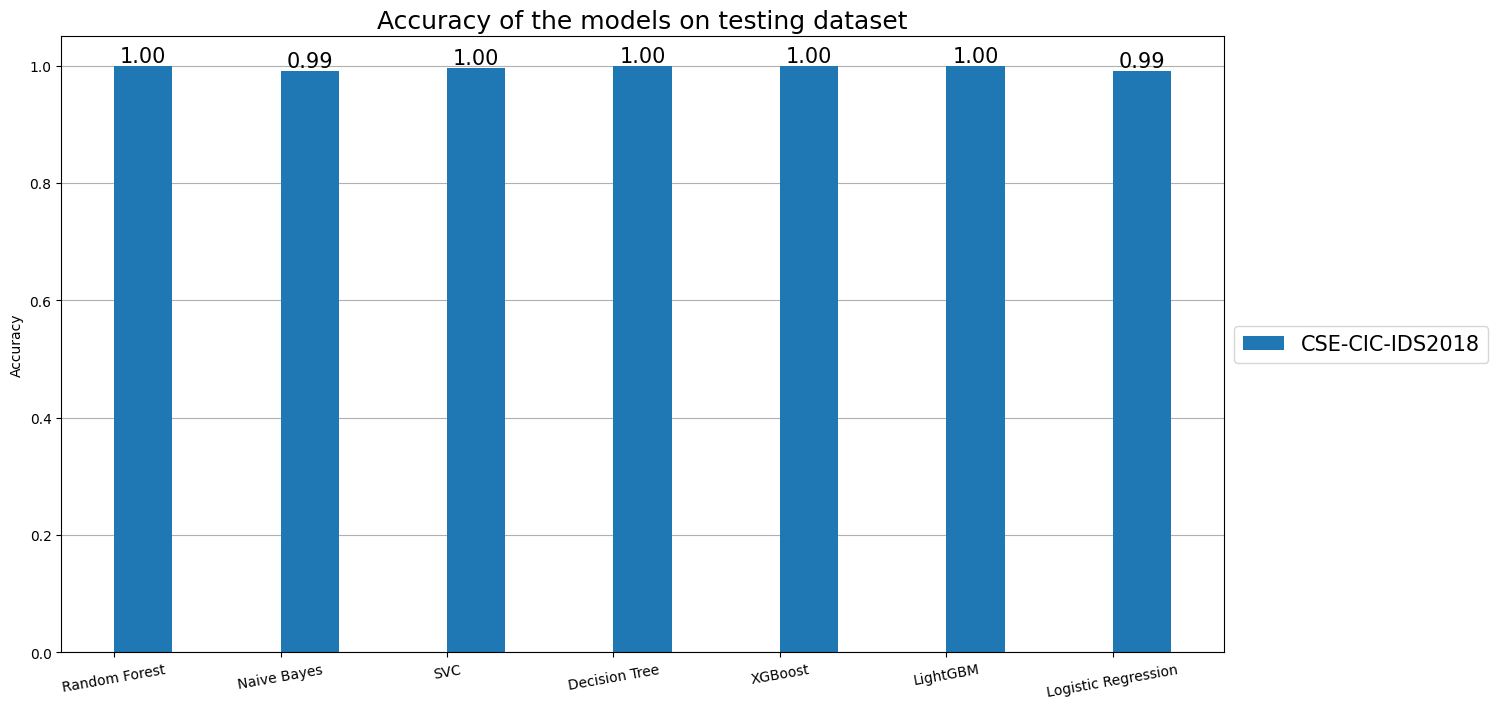

In [ ]:
fig, ax = plt.subplots(figsize= (15, 8))
plt.rcParams.update({'font.size': 15})

x = np.arange(len(accuracy_testing_dataset.keys())) # label location
width = 0.35 # width of the bar

bar_accuracy = ax.bar(x + width/2, accuracy_testing_dataset.values(), width, label='CSE-CIC-IDS2018')

ax.set_ylabel('Accuracy')
ax.set_title('Accuracy of the models on testing dataset')
ax.set_xticks(x)
ax.set_xticklabels(accuracy_testing_dataset.keys())
plt.setp(ax.get_xticklabels(), rotation=10, horizontalalignment='center') # rotate the label
ax.grid(axis='y')
ax.set_axisbelow(True) # set the grid behind the bars

# put a legend to the right of the axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

label_top(bar_accuracy)

plt.show()



##2.F1 Score

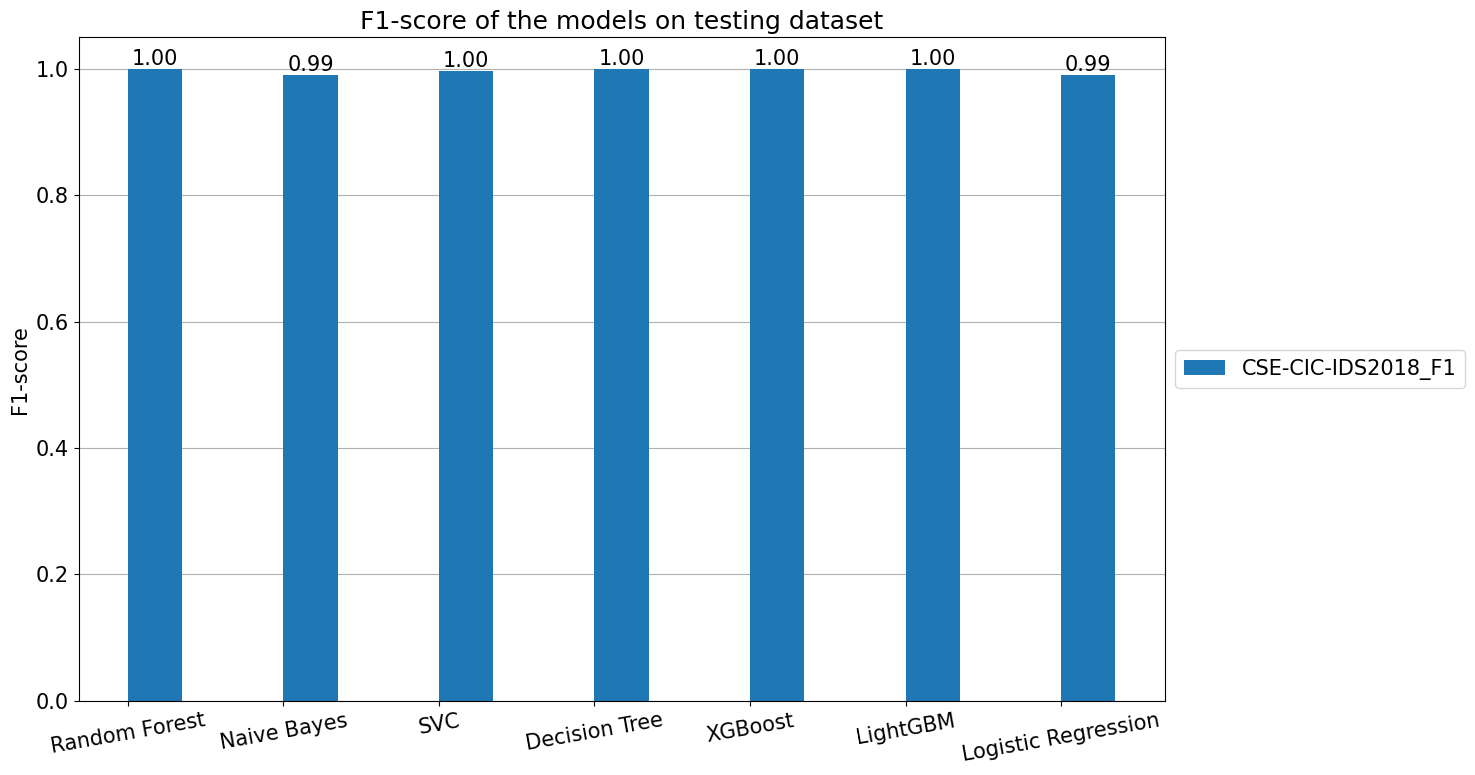

In [ ]:
fig, ax = plt.subplots(figsize= (15, 8))
plt.rcParams.update({'font.size': 15})

x = np.arange(len(f_score_testing_dataset.keys())) # label location
width = 0.35 # width of the bar

bar_f1 = ax.bar(x + width/2, f_score_testing_dataset.values(), width, label='CSE-CIC-IDS2018_F1')

ax.set_ylabel('F1-score')
ax.set_title('F1-score of the models on testing dataset')
ax.set_xticks(x)
ax.set_xticklabels(f_score_testing_dataset.keys())
plt.setp(ax.get_xticklabels(), rotation=10, horizontalalignment='center') # rotate the label
ax.legend()
ax.grid(axis='y')
ax.set_axisbelow(True) # set the grid behind the bars

# put a legend to the right of the axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

label_top(bar_f1)

fig.tight_layout()

plt.show()

## 3.Recall Score

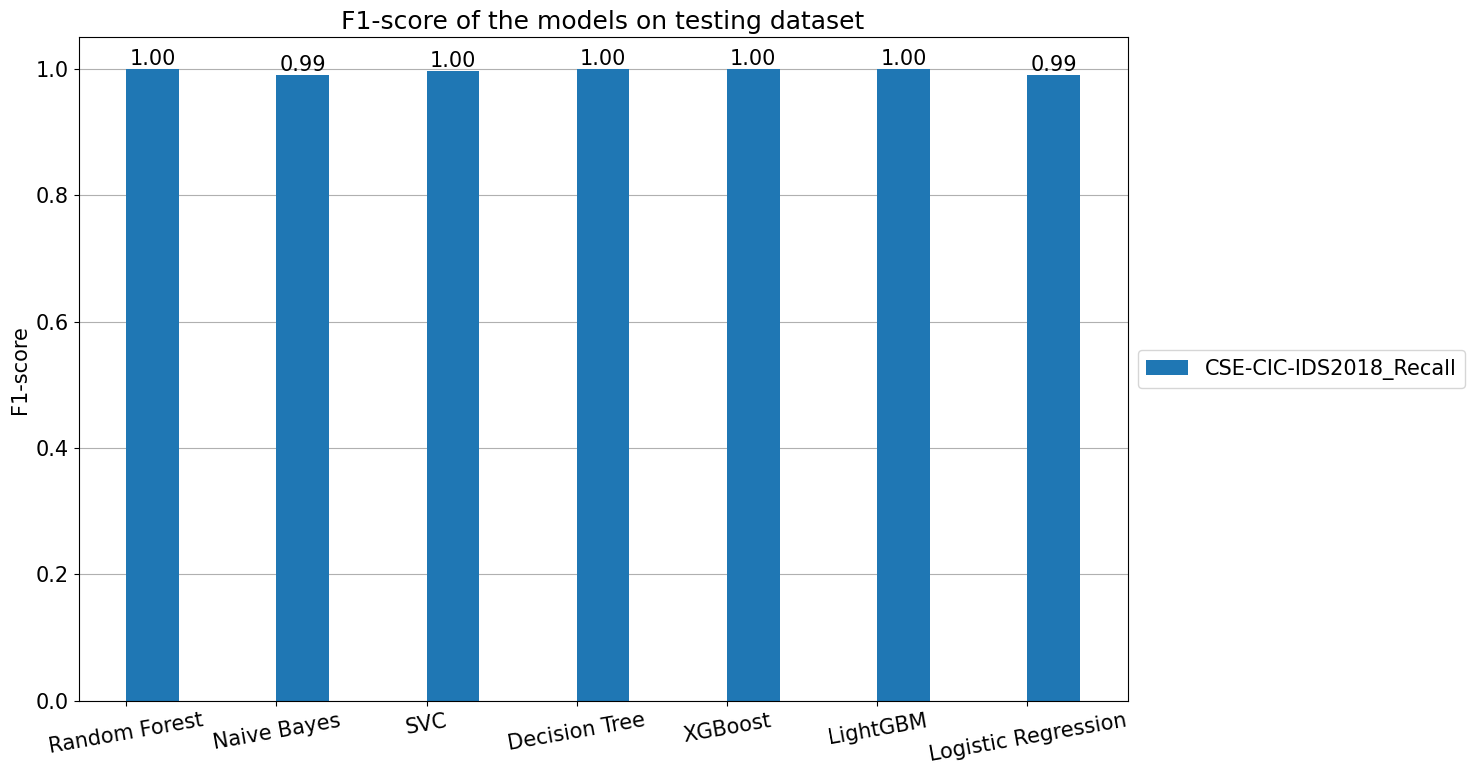

In [ ]:
fig, ax = plt.subplots(figsize= (15, 8))
plt.rcParams.update({'font.size': 15})

x = np.arange(len(recall_testing_dataset.keys())) # label location
width = 0.35 # width of the bar

bar_recall= ax.bar(x + width/2, f_score_testing_dataset.values(), width, label='CSE-CIC-IDS2018_Recall')

ax.set_ylabel('F1-score')
ax.set_title('F1-score of the models on testing dataset')
ax.set_xticks(x)
ax.set_xticklabels(recall_testing_dataset.keys())
plt.setp(ax.get_xticklabels(), rotation=10, horizontalalignment='center') # rotate the label
ax.legend()
ax.grid(axis='y')
ax.set_axisbelow(True) # set the grid behind the bars

# put a legend to the right of the axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


label_top(bar_recall)

fig.tight_layout()

plt.show()

##4.False Negative Rate(FNR)

In [ ]:
# Calculate FNR values for each model
fnr_values = []

for model, name in zip(models, model_names):
    y_pred = model.predict(X_test)
    fnr = (y_pred[y_test == 1] != y_test[y_test == 1]).sum() / y_test[y_test == 1].shape[0]
    fnr_values.append(fnr)
    print(f'{name} - False Negative Rate: {fnr:.4f}')

Random Forest - False Negative Rate: 0.0005
Naive Bayes - False Negative Rate: 0.0222
SVC - False Negative Rate: 0.0014
Decision Tree - False Negative Rate: 0.0006
XGBoost - False Negative Rate: 0.0005
LightGBM - False Negative Rate: 0.0005
Logistic Regression - False Negative Rate: 0.0077


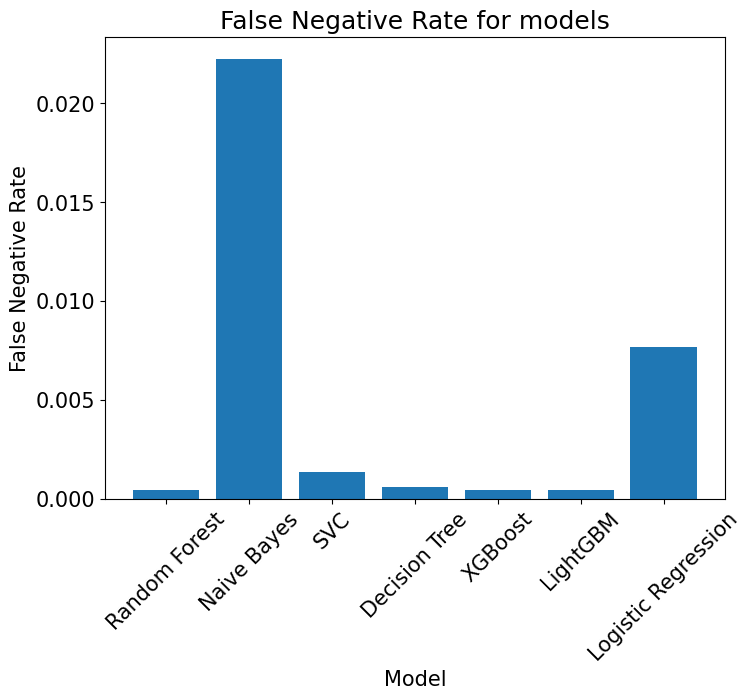

In [ ]:
# Plot the FNR values
plt.figure(figsize=(8, 6))
plt.bar(model_names, fnr_values)
plt.xlabel('Model')
plt.ylabel('False Negative Rate')
plt.title('False Negative Rate for models')
plt.xticks(rotation=45)
plt.show()

### 5.ROC/Precision-Recall curves

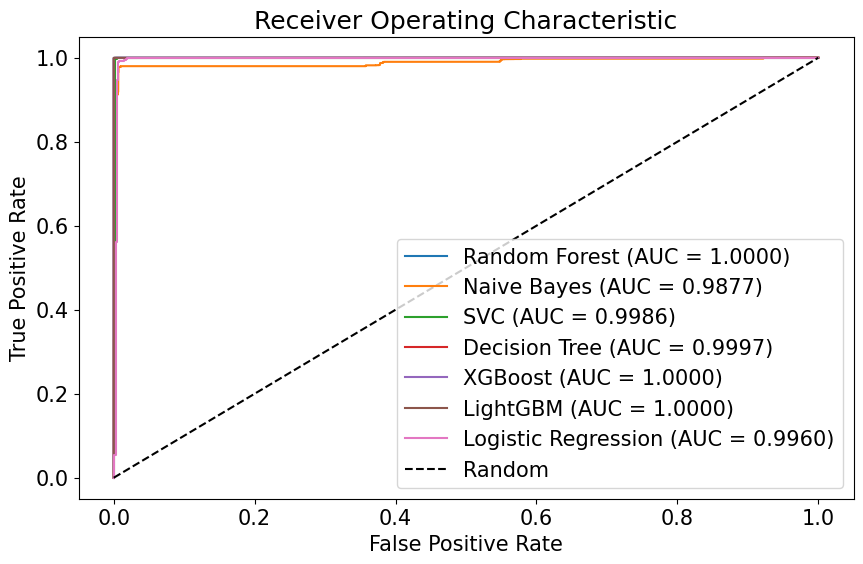

In [ ]:
##ROC and AUC
import plotly.express as px
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))

for model, name in zip(models, model_names):
    if hasattr(model, 'predict_proba'):
        y_score = model.predict_proba(X_test)[:, 1]
    else:
        y_score = model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.4f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

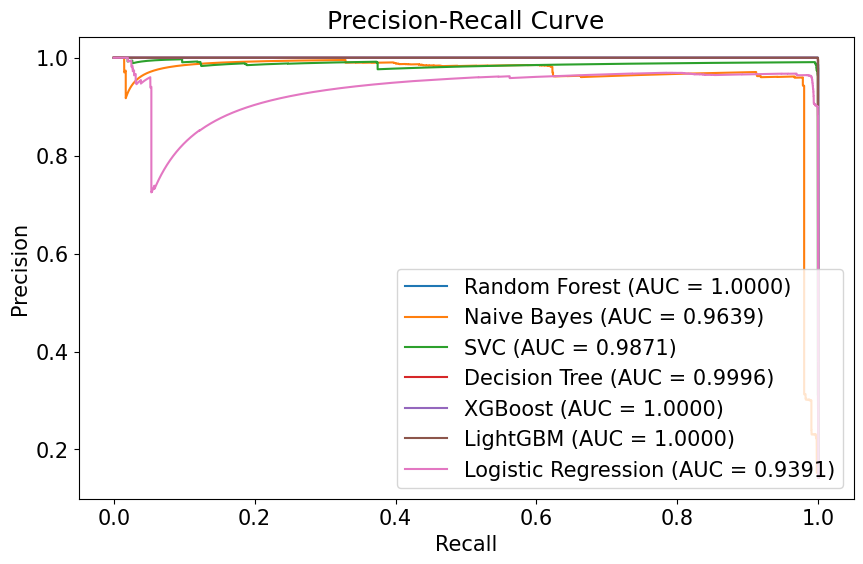

In [ ]:
###Precision-Recall curves


plt.figure(figsize=(10, 6))

for model, name in zip(models, model_names):
    if hasattr(model, 'predict_proba'):
        y_score = model.predict_proba(X_test)[:, 1]
    else:
        y_score = model.decision_function(X_test)
    precision, recall, _ = precision_recall_curve(y_test, y_score)
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, label=f'{name} (AUC = {pr_auc:.4f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower right')
plt.show()